In [1]:
from PIL import Image, ImageFilter
import os, glob, sys
import numpy as np

In [2]:
im = Image.open("donkeycar_pics/image3.jpg")
im_q = im.resize((640,480))

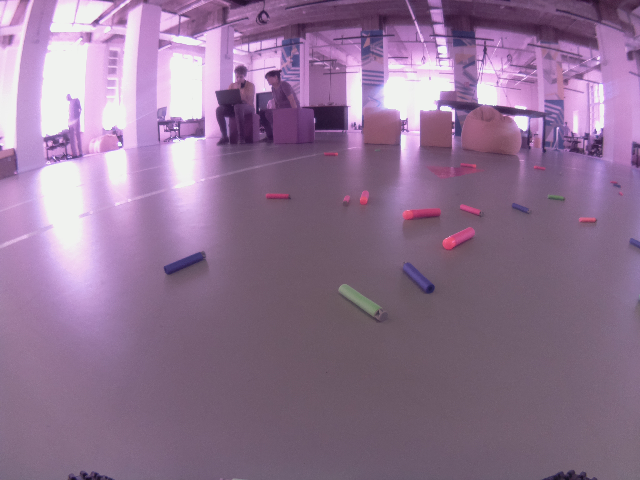

In [3]:
im_q

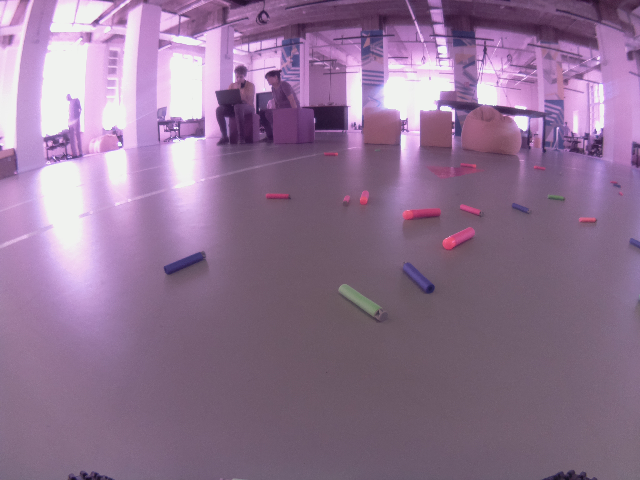

In [4]:
im_q

In [5]:
# table = [[0,0,0],[10,10,10],[20,20,20],[30,30,30],[40,40,40],[60,60,60],[80,80,80],[100,100,100]]
# fil = ImageFilter.Color3DLUT(2, table)
# im_q.filter(fil)

In [6]:
ar = np.array(im_q)
ar.shape

(480, 640, 3)

In [15]:
red5_mask = np.all(np.abs(ar - [200,80,120]) < [15,10,10], axis=-1)
blue2_mask = np.all(np.abs(ar - [55,40,95]) < [5,10,5], axis=-1)
green2_mask = np.all(np.abs(ar - [150,150,145]) < [10,15,10], axis=-1)


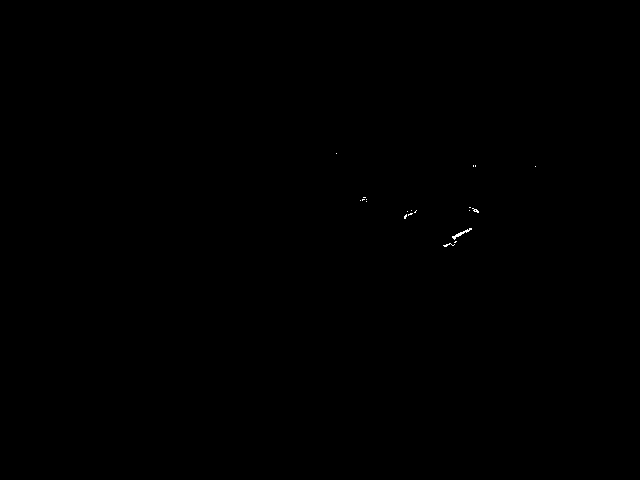

In [16]:
Image.fromarray(red5_mask)

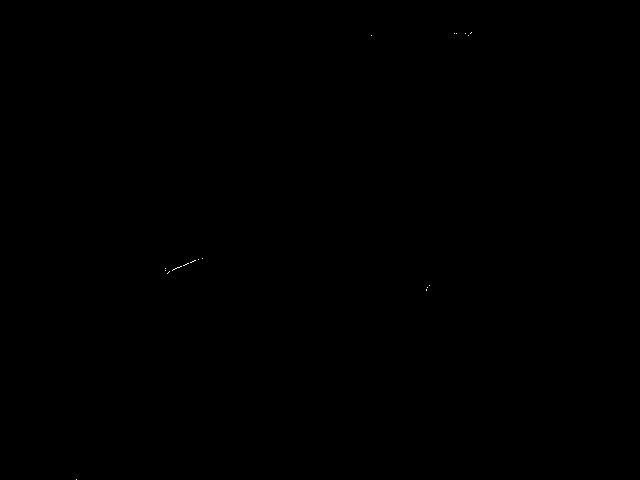

In [17]:
Image.fromarray(blue2_mask)

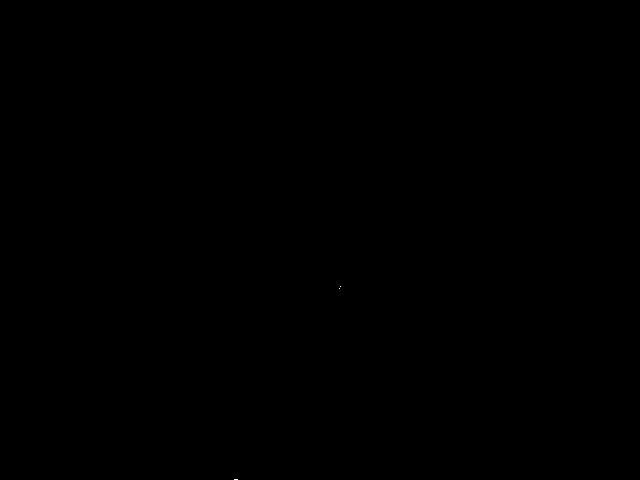

In [18]:
Image.fromarray(green2_mask)

In [ ]:
im_q.filter()